## Challenge 1

For this challenge of the project I will need to create binary variables based on text applying simple Natural Language Processing and "recode" variables using conditions.

I will need to create two variables for the Twitter data based on the text column. They should be two **meaningful** categories for this dataset, and they can either be binary taking the value 0 (when the tweet is not of that category) or 1 (when the tweet is of that category) or categorical with multiple meaningful categories that a tweet can fall under.


### Interpretation

* **Technical** summary:

**The data collected were tweets dated during the 50th Greenpeace anniversary. It made sense to know which of the tweets were referring somehow to such event and to do so a binary variable has been created, namely "anniversary_tag". Another variablke has been created, namely "fundrising_tag" in order to know if any of the tweets were referring somehow to any fundrising or supportive content. Would be important for the ONG to have an approximate amount of possible supporters for an eventual fundrising campaign. There is a link between the two variable. Enthusiast users about the 50th anniversary may be also willing to fundrise an eventual campaign and this is why this 2 variables have been created**



* **Business** summary:

**The data collected showed that 10 tweets out of 110 were referring to the 50th anniversary of the company, about 9.1%. Instead, 9 tweets out of 110 were referring to a fundrising or supportive-related topic, about 8.1%. The data of the two variables have been merged in a third variable, namely "possible_targets", showing that out of a sample of 110 tweets 17 are referred to enthusiastic users mentioning the anniversary or either topics which can be in favour of a fundrising campaign, about the 15.5%. The results show that a possible 15.5% of users among the social medis followers of ONG would be willing to support a fundrising campaign although the sample is too small to accurately predict the final result. Considering the solid amount of social media followers of the ONG (31 millions), if a 15.5% would approximately contribute to the fundrising campaign with 1 dollar,an estimation of the result of the Fundraising Campaign can be deducted: 4.805.000,00$**

* Possible **Biases**:

1) The first bias it is about the tweets and their texts. Collecting data from Twitter makes us depending on the data owner which can decide eventually not to display the full text of the tweet for instance. Without the full text of the tweet the sentiment analysis would not produce reliable data (since relevant part of the text may be omitted) and thus a bias from the first layer would have been carried at the second layer (sentiment analysis). Also, a predictive reliable model starts with information about many people, potentially millions, and the limited amount of tweets we can collet from twitter does not allow us to gain much reliability. Also, the query made on twarc about which kind of tweets to collect may carry some bias depending on the keyword used for it. 
2) Secondly, when creating a sentiment score, bias from a tweet not containig the full text may produce false positive or false negative scores. Furthermore, the binary variable created to look if a specific word in the tweets may carry a bias and let us make the wrong assumpions: in my query I have looked for the word "50th" and "anniversary" to understand if the tweet was referring to such topics. Such query looks reliable. The second query made with the keywords "fundrising" and "support" has been made in order to undersant if the tweet was referring to such topics and then categorize the user as a possible supporter of the fundrising campaign may carry bias: only becasue the words "fundrising" or "support" were present in the tweets does not mean that the individual would be surely willing to support the campaign with a donation. The causality here is just a mere assumption. Let's see the other side of the medal, in a limited sample, let's suppose the result of our analysis are correct and indeed the users identified by our data elaboration would be willing to support the campaign with a donation. This does not automatically mean that the same portion of a biggest sample will be willing to do the same. The score generated by a model of a specific sample may not generate the same result across different groups.

**Importing the libraries I will need to perform, namely Pandas and Seaborn**

In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [2]:
complete = pd.read_pickle('complete.pkl')

In [3]:
complete.head()

,id,screen_name,created_at,source,full_text,retweet_count,favorite_count,followers_count_no_na,friendsCount_no_na,positive,negative,neutral,sent_score,sentiment
0,1438236436084391936,CitizenWonk,2021-09-15 20:21:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @PBIcanada: We congratulate @GreenpeaceCA o...,7,0,32259.000,27188.000,3,-1,1,2,positive
1,1438236402114772995,mark_trudgeon,2021-09-15 20:20:54+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @cadebe_: @GJGamble @BorisJohnson @trussliz...,1,0,340.000,1516.000,1,-1,0,0,neutral
2,1438236275283214343,AspieandMe,2021-09-15 20:20:23+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","RT @GreenpeaceCA: I scream, you scream, WE ALL...",2,0,387.000,672.000,2,-5,-1,-3,negative
3,1438235849058045956,gazetka75,2021-09-15 20:18:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @LongTimeAmy: TODAY IN HISTORY\n\n1971–Envi...,16,0,1.000,35.000,2,-1,1,1,positive
4,1438235834415714308,arynpekik,2021-09-15 20:18:38+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @zoev213: Happy 50th @greenpeaceusa Join me...,2,0,446.000,443.000,3,-1,1,2,positive


**Dropping eventual duplicates in order not have wrong results from my analysis**

In [4]:
complete2 = complete.drop_duplicates(subset ="full_text",
                     ignore_index=True)

In [5]:
len(complete2)

263

In [6]:
complete.dtypes

id                                     int64
screen_name                           object
created_at               datetime64[ns, UTC]
source                                object
full_text                             object
retweet_count                          int64
favorite_count                         int64
followers_count_no_na                float64
friendsCount_no_na                   float64
positive                               int64
negative                               int64
neutral                                int64
sent_score                             int64
sentiment                             object
dtype: object

**Writing a function which will detect users with more than 3000 followers: to such users a "Token" will be assigned which will categorize them as special users since they may be considered hot targets for the fundrising campaign**

In [7]:
def categorise_df(row):
    row['special_users'] = 0
    if (row['followers_count_no_na'] > 3000) or (row['friendsCount_no_na'] > 3000):
        row['special_users'] = 1
        
    return row 

In [8]:
complete2 = complete2.apply(categorise_df, axis=1)

**Among the 263 Users, 34 have had a Token assigned (So they have a number of Followers above 3000)**

In [9]:
complete2['special_users'].value_counts()

0    229
1     34
Name: special_users, dtype: int64

**12% of the Users are Special Users**

In [10]:
complete2['special_users'].value_counts(normalize=True)

0   0.871
1   0.129
Name: special_users, dtype: float64

**Checking for bots among the Users (Users that have no Followers)**

In [11]:
def categorise_df(row):
    row['bots'] = 0
    if (row['followers_count_no_na'] < 1) or (row['friendsCount_no_na'] < 1):
        row['bots'] = 1
        
    return row 

In [12]:
complete2 = complete2.apply(categorise_df, axis=1)

**Apparently 151 Users are most likely bots since they have no followers. It is the 57.4%**

In [13]:
complete2['bots'].value_counts()

1    151
0    112
Name: bots, dtype: int64

In [14]:
complete2['bots'].value_counts(normalize=True)

1   0.574
0   0.426
Name: bots, dtype: float64

In [15]:
pd.set_option('display.max_rows', 10)

In [16]:
complete2['followers_count_no_na'].value_counts

<bound method IndexOpsMixin.value_counts of 0     32259.000
1       340.000
2       387.000
3         1.000
4       446.000
         ...   
258       0.000
259       0.000
260       0.000
261       0.000
262       0.000
Name: followers_count_no_na, Length: 263, dtype: float64>

**Writing a function which will allow us to make queries by words or symbols in the Tweets. Python will assign a Token for each word found in our Query**

In [17]:
def wordlist_any_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0



**Making all the text of my Tweets Data in small case in order for the function to work properly (the function is only able to detect small case text)**

In [18]:
complete2["full_text"].str.lower()

0      rt @pbicanada: we congratulate @greenpeaceca o...
1      rt @cadebe_: @gjgamble @borisjohnson @trussliz...
2      rt @greenpeaceca: i scream, you scream, we all...
3      rt @longtimeamy: today in history\n\n1971–envi...
4      rt @zoev213: happy 50th @greenpeaceusa join me...
                             ...                        
258    rt @dedubius: @gjgamble @chrisgpackham @borisj...
259    @cowboy_satin @23brookside @people4bernie @ber...
260    rt @jubileam8: #glyphosate spraying purposeful...
261    rt @abukaalfred: different countries, differen...
262      happy 50th greenpeace ! https://t.co/gtbwdyogri
Name: full_text, Length: 263, dtype: object

**Creating 2 different tags in order to apply the query. Namely the "Anniversary Tag" will look for the words 'happy' or 'birthday' since such enthusiast users may be targeted by the fundraising campaign. Instead, the "Fundraising tag" will look for the words 'fundraising 'or 'support' since we may find users which are already expressively willing to support the Organization**

In [19]:
complete2['anniversary_tag'] = complete2['full_text'].apply(wordlist_any_present, args=(['happy','birthday'],))

In [20]:
complete2['fundraising_tag'] = complete2['full_text'].apply(wordlist_any_present, args=(['fundraising ', 'support'],))

**The "Anniversary Tag" has been detected in 29 posts, the 11% of the Tweets collected in the Data**

In [21]:
complete2['anniversary_tag'] .value_counts()

0    234
1     29
Name: anniversary_tag, dtype: int64

In [22]:
complete2['anniversary_tag'] .value_counts(normalize=True)

0   0.890
1   0.110
Name: anniversary_tag, dtype: float64

**The "Fundraising Tag" has been detected in 15 posts, approximately the 5% of the Tweets collected in the Data**

In [23]:
complete2['fundraising_tag'].value_counts()

0    250
1     13
Name: fundraising_tag, dtype: int64

In [24]:
complete2['fundraising_tag'].value_counts(normalize=True)

0   0.951
1   0.049
Name: fundraising_tag, dtype: float64

In [25]:
complete2.head()

,id,screen_name,created_at,source,full_text,retweet_count,favorite_count,followers_count_no_na,friendsCount_no_na,positive,negative,neutral,sent_score,sentiment,special_users,bots,anniversary_tag,fundraising_tag
0,1438236436084391936,CitizenWonk,2021-09-15 20:21:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @PBIcanada: We congratulate @GreenpeaceCA o...,7,0,32259.000,27188.000,3,-1,1,2,positive,1,0,0,0
1,1438236402114772995,mark_trudgeon,2021-09-15 20:20:54+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @cadebe_: @GJGamble @BorisJohnson @trussliz...,1,0,340.000,1516.000,1,-1,0,0,neutral,0,0,0,0
2,1438236275283214343,AspieandMe,2021-09-15 20:20:23+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","RT @GreenpeaceCA: I scream, you scream, WE ALL...",2,0,387.000,672.000,2,-5,-1,-3,negative,0,0,0,0
3,1438235849058045956,gazetka75,2021-09-15 20:18:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @LongTimeAmy: TODAY IN HISTORY\n\n1971–Envi...,16,0,1.000,35.000,2,-1,1,1,positive,0,0,0,0
4,1438235834415714308,arynpekik,2021-09-15 20:18:38+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @zoev213: Happy 50th @greenpeaceusa Join me...,2,0,446.000,443.000,3,-1,1,2,positive,0,0,1,1


**Writing a function which will allow me to categorize the results of the tags in one single column, namely the "Possible Targets". Among the Tweets, a 15.2% of possible targets have been found**

In [26]:
def categorise_df(row):
    row['possible_targets'] = 0
    if (row['anniversary_tag'] == 1) or (row['fundraising_tag'] == 1):
        row['possible_targets'] = 1
        
    return row 

In [27]:
complete2 = complete2.apply(categorise_df, axis=1)

In [28]:
complete2['possible_targets'].value_counts()

0    223
1     40
Name: possible_targets, dtype: int64

In [29]:
complete2['possible_targets'].value_counts(normalize=True)

0   0.848
1   0.152
Name: possible_targets, dtype: float64

## Challenge 2

In this part of the project I will need to:
* Show descriptive statistics for the IV and the DV
* Create one univariate visualisation for the IV
* Create one univariate visualisation for the DV
* Create one bivariate visualisation with the IV and DV in the same chart
* Show the descriptives of the DV grouped by the IV and interpret them


### Step-by-step Interpretation:


In [30]:
complete2.columns

Index(['id', 'screen_name', 'created_at', 'source', 'full_text',
       'retweet_count', 'favorite_count', 'followers_count_no_na',
       'friendsCount_no_na', 'positive', 'negative', 'neutral', 'sent_score',
       'sentiment', 'special_users', 'bots', 'anniversary_tag',
       'fundraising_tag', 'possible_targets'],
      dtype='object')

**Here will be provided the Descriptive Statistics of our Independent Variable and Dependent Variables. As we can see, the avergare Sentiment score of the Tweets which talks about "Greenpeace" is positive. In average, any of these Tweets has been retweetted 13 times and liked 3 times by other users reading it**

In [31]:
complete2[['sent_score', 'retweet_count','favorite_count']].describe()

,sent_score,retweet_count,favorite_count
count,263.000,263.000,263.000
mean,0.019,13.665,3.019
std,1.383,54.376,37.205
min,-4.000,0.000,0.000
25%,-1.000,0.000,0.000
50%,0.000,0.000,0.000
75%,1.000,4.000,0.000
max,3.000,648.000,602.000


**Here I have made a univariate visualisation for the Independet Variable. Task 2 completed**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sent_score', ylabel='Density'>

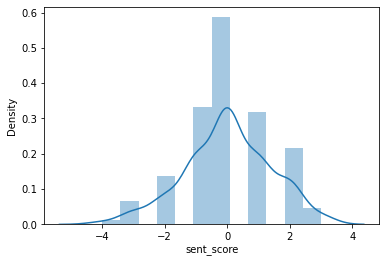

In [32]:
sns.distplot(complete2['sent_score'])

**Here I have made a univariate visualisation for each of the Dependent Variables. Task 3 completed**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retweet_count', ylabel='Density'>

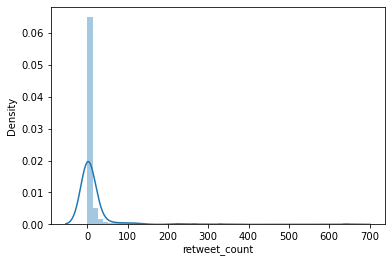

In [33]:
sns.distplot(complete2['retweet_count'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='favorite_count', ylabel='Density'>

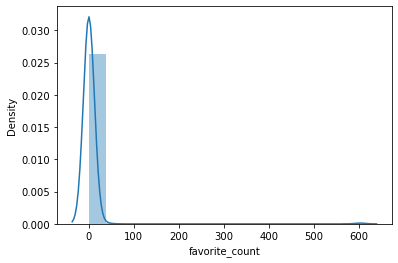

In [34]:
sns.distplot(complete2['favorite_count'])

**Here I have made a  visualisation for the amount of "Tokens" assigned for the""Anniversary Tag"**

<AxesSubplot:xlabel='anniversary_tag', ylabel='count'>

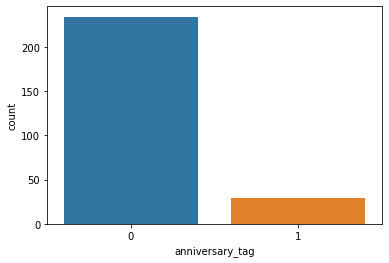

In [35]:
sns.countplot(x='anniversary_tag', data=complete2)

**Here I have made two visualisation for the amount of "Tokens" assigned for the "Fundraising Tag" and "Anniversary Tag"**

<AxesSubplot:xlabel='fundraising_tag', ylabel='count'>

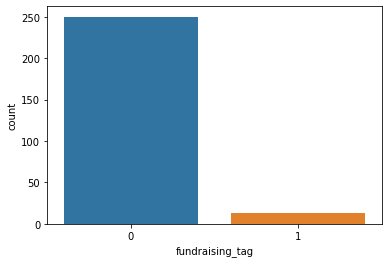

In [36]:
sns.countplot(x='fundraising_tag', data=complete2)

<AxesSubplot:xlabel='anniversary_tag', ylabel='count'>

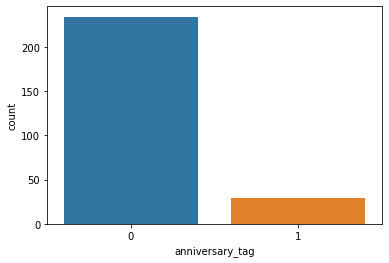

In [37]:
sns.countplot(x='anniversary_tag', data=complete2)

**Here I'm creating a bivariate visualisation with the IV and DV in the same chart. Task 4 completed**

<AxesSubplot:xlabel='sent_score', ylabel='retweet_count'>

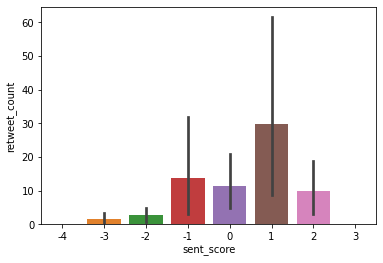

In [38]:
sns.barplot(x='sent_score', y='retweet_count', data=complete2)

<AxesSubplot:xlabel='sent_score', ylabel='favorite_count'>

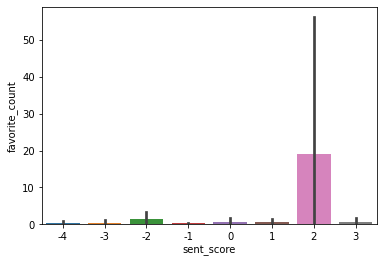

In [39]:
sns.barplot(x='sent_score', y='favorite_count', data=complete2)

**Here I am providing the descriptives of the Dependent Variables grouped by the Independet Variable. As we can see the average number of Retweets goes higher as the Sentiment expressed in the Tweet is more positive (an average of 9 retweets if the Tweets expressed a negative sentiment vs 11.5 retweets if the Tweets expressed a neutral sentiment vs 20 retweets if the Tweets expressed a positive sentiment). The same can be said about the number of Favorites: Tweets got an average of 0.6 or 0.7 likes for Tweets expressing a negative or neutral sentiment vs an average of 7.5 likes ofr every Tweet expressing a positive Sentiment. Task 5 completed**

In [40]:
complete2.groupby(['sentiment'])['retweet_count','favorite_count'].describe().transpose()

<ipython-input-40-c393f3ffc914>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  complete2.groupby(['sentiment'])['retweet_count','favorite_count'].describe().transpose()


sentiment             negative  neutral  positive
retweet_count  count    84.000   90.000    89.000
               mean      9.131   11.500    20.135
               std      38.310   39.985    75.730
               min       0.000    0.000     0.000
               25%       0.000    0.000     0.000
...                        ...      ...       ...
favorite_count min       0.000    0.000     0.000
               25%       0.000    0.000     0.000
               50%       0.000    0.000     0.000
               75%       1.000    0.000     0.000
               max      20.000   38.000   602.000

[16 rows x 3 columns]